# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
arquivo = pd.read_csv('sinasc_RO_2019.csv')
df = pd.DataFrame(arquivo)
df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df.loc[df['APGAR5'] >= 8, 'ind_asfixia'] = 'Normal'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'ind_asfixia'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'ind_asfixia'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 0) & (df['APGAR5'] <= 3), 'ind_asfixia'] = 'asfixia severa'
np.round(df['ind_asfixia'].value_counts(normalize = True)*100, 2)

ind_asfixia
Normal              98.28
asfixia leve         1.19
asfixia severa       0.27
asfixia moderada     0.25
Name: proportion, dtype: float64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

([0, 1, 2, 3],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'asfixia leve'),
  Text(2, 0, 'asfixia severa'),
  Text(3, 0, 'asfixia moderada')])

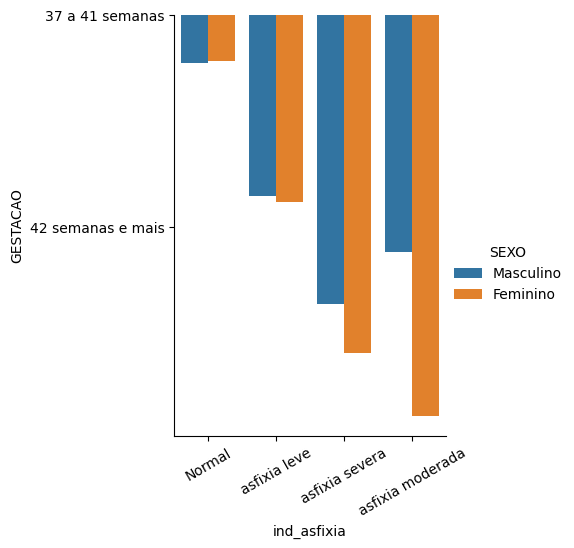

In [4]:
sns.catplot(x='ind_asfixia', y='GESTACAO',
            hue = 'SEXO',
            kind = 'bar',
            data = df,
            errorbar = None
           )
plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

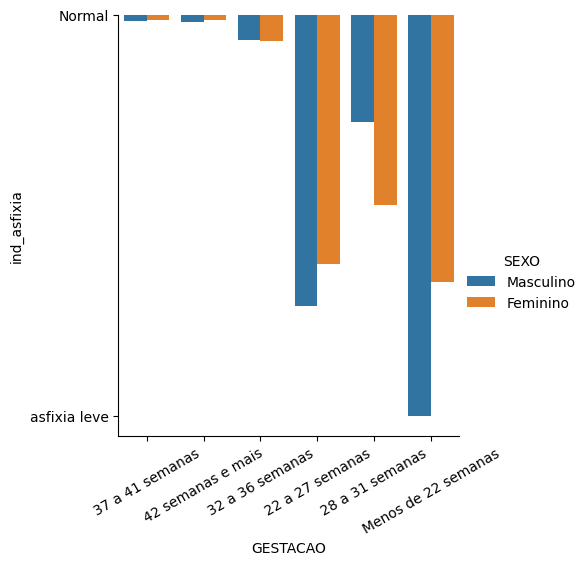

In [34]:
sns.catplot(x='GESTACAO', y='ind_asfixia',
            hue = 'SEXO',
            kind = 'bar',
            data = df,
            errorbar = None
           )
plt.xticks(rotation=30)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tab_cruz = pd.crosstab(df['GESTACAO'], df['APGAR5'])
tab_cruz

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
tab_cruz_pctlin = tab_cruz.div(tab_cruz.sum(axis = 1), axis = 0)
np.round(tab_cruz_pctlin*100,2)

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.24,0.00,9.41,7.06,1.18,0.00,2.35,11.76,28.24,22.35,9.41
28 a 31 semanas,0.00,0.00,1.23,0.62,3.09,4.32,4.32,6.79,37.65,33.95,8.02
32 a 36 semanas,0.09,0.09,0.09,0.09,0.36,0.49,0.76,2.51,16.20,58.50,20.81
37 a 41 semanas,0.02,0.09,0.01,0.02,0.03,0.09,0.20,0.67,6.29,60.23,32.34
42 semanas e mais,0.14,0.00,0.00,0.00,0.00,0.14,0.14,0.72,6.30,60.60,31.95
Menos de 22 semanas,14.29,0.00,14.29,0.00,0.00,0.00,0.00,14.29,0.00,42.86,14.29


In [7]:
tab_cruz_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

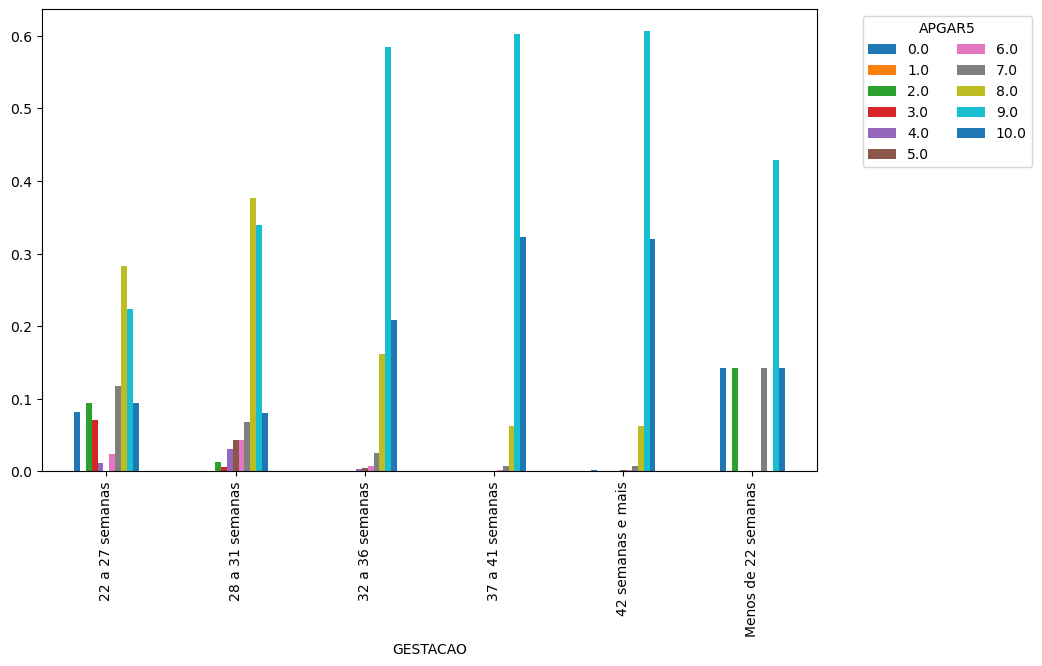

In [8]:
tab_cruz_pctlin.plot.bar(figsize=(10, 6))
plt.legend(title="APGAR5", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=2)

Por conta de o APGAR indicar o nivel de asfixia e não a determinação de se o bebê é prematuro ou não, a relação entre tempo de gestação e APGAR acaba se tornando inconclusiva para determinar se o bebê é prematuro.
Se tentarmos relacionar nível de asfixia com tempo de gestão, nesse caso observamos que de 27 semanas para menos os casos de asfixia começam a aumentar, inclusive a asfixia grave.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

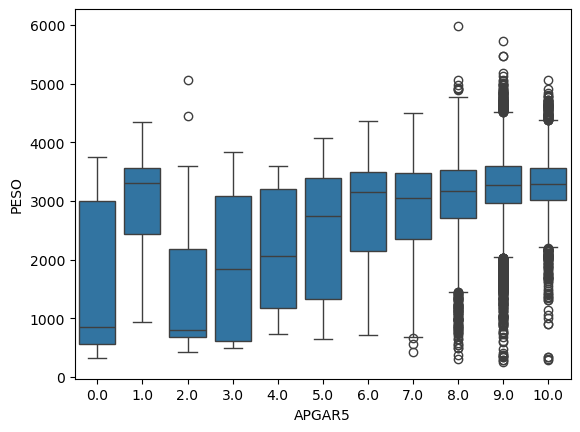

In [12]:
sns.boxplot(data = df,
            x = 'APGAR5',
            y = 'PESO'
           )

<Axes: xlabel='APGAR5', ylabel='PESO'>

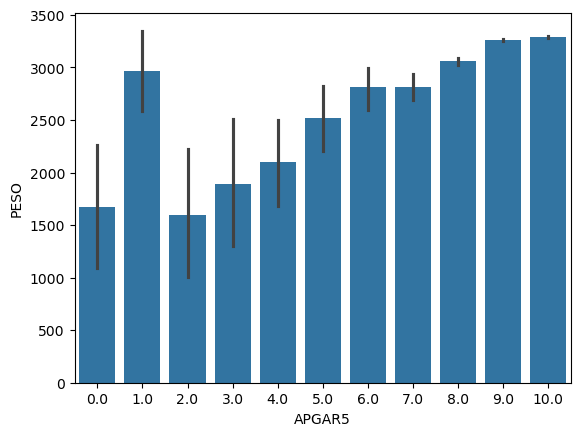

In [19]:
sns.barplot(data = df,
            x = 'APGAR5',
            y = 'PESO'
           )